In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Basic

# Optimization

In [2]:
from scipy.optimize import minimize

In [4]:
def f(x):
    return (x-3)**2
res=minimize(f, 9)
res.x

array([3.00000005])

In [7]:
f=lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
cons=({'type':'ineq','fun': lambda x:x[0]-2*x[1]+2 }, 
      {'type':'ineq','fun': lambda x:-x[0]-2*x[1]+6 },
      {'type':'ineq','fun': lambda x:-x[0]+2*x[1]+2})
bounds=((0, None),(0, None))
res=minimize(f, (2,0), bounds=bounds, constraints=cons)

In [8]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

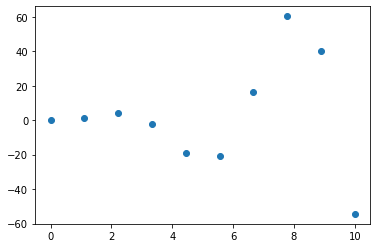

In [10]:
x=np.linspace(0, 10, 10)
y=x**2*np.sin(x)
plt.scatter(x,y)

In [12]:
from scipy.interpolate import interp1d

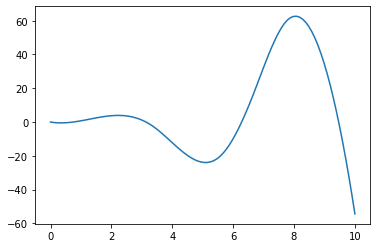

In [16]:
f=interp1d(x, y, kind='cubic')
x_dense=np.linspace(0, 10, 100)
y_dense=f(x_dense)
plt.plot(x_dense, y_dense)

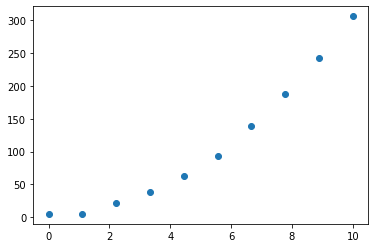

In [48]:
x_data=np.linspace(0,10, 10)
y_data=3*x**2 + 5
y_data+=np.random.randn(len(y_data))*2 
plt.scatter(x_data, y_data)

In [49]:
print(np.vstack([x_data, y_data]).T)

[[  0.           5.5957123 ]
 [  1.11111111   5.17796039]
 [  2.22222222  21.30322114]
 [  3.33333333  39.11229286]
 [  4.44444444  62.49124522]
 [  5.55555556  93.79951329]
 [  6.66666667 138.99352057]
 [  7.77777778 187.23966648]
 [  8.88888889 242.27685331]
 [ 10.         306.23109589]]


In [50]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 +b
popt, pcov=curve_fit(func, x_data, y_data, p0=(1,1))

In [51]:
popt

array([3.01767505, 4.04465281])

In [41]:
pcov

array([[ 5.76395565e-32, -2.02805849e-30],
       [-2.02805849e-30,  1.34703148e-28]])

In [43]:
np.random.randn(3)

array([ 0.33600244,  0.85242471, -0.47697784])

## Special Function

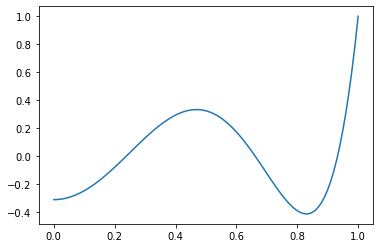

In [52]:
from scipy.special import legendre
x=np.linspace(0,1,100)
plt.plot(x, legendre(6)(x))
plt.show()

In [53]:
from scipy.misc import derivative

In [54]:
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)
x=np.linspace(0,1,100)

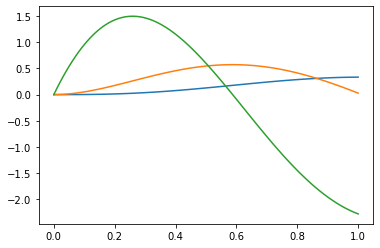

In [57]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

In [67]:
np.sort(np.abs(derivative(f, x, dx=1e-6) -derivative(f, x, dx=1e-6, n=2)))

array([6.00000000e-12, 1.81796907e-02, 5.32531787e-02, 8.91080081e-02,
       1.18152910e-01, 1.25344699e-01, 1.59129595e-01, 1.97583992e-01,
       2.28382335e-01, 2.30196800e-01, 2.70321754e-01, 2.96572723e-01,
       3.36151450e-01, 3.42993886e-01, 3.63641997e-01, 4.15842330e-01,
       4.29363674e-01, 4.36044114e-01, 4.88444013e-01, 4.93704378e-01,
       5.29909148e-01, 5.56463013e-01, 5.60848810e-01, 6.17548321e-01,
       6.17788006e-01, 6.33079935e-01, 6.76742962e-01, 6.99728549e-01,
       7.04578810e-01, 7.34008828e-01, 7.75703855e-01, 7.75785600e-01,
       7.89098472e-01, 8.41957568e-01, 8.46019656e-01, 8.46203914e-01,
       8.92357160e-01, 9.10496883e-01, 9.15995392e-01, 9.40254495e-01,
       9.69290301e-01, 9.84773664e-01, 9.85411389e-01, 1.02247636e+00,
       1.02775507e+00, 1.05270694e+00, 1.06711450e+00, 1.07014032e+00,
       1.10338696e+00, 1.11236836e+00, 1.11954808e+00, 1.13635066e+00,
       1.14925451e+00, 1.16594930e+00, 1.18089489e+00, 1.18527293e+00,
      

In [76]:
q=np.round(np.abs(derivative(f, x, dx=1e-6) -derivative(f, x, dx=1e-6, n=2)), 1) ==0

In [77]:
x[q]

array([0.        , 0.50505051])

In [82]:
from scipy.integrate import quad
integrand=lambda x: x**2*np.sin(x)*np.exp(-x)
integral, ierror=quad(integrand, 0, 1)

In [83]:
integral

0.10246777930717413

In [ ]:
from scipy.integrate import dblquad
intergrand = lambda x, y: np.sin(x+y**2)
lwr_y=lambda x: -x
upr_y= lambda 